## PyTorch Essentials: Module 2
**Key Concepts:**  
- `nn.Module` lifecycle  
- Common layers (Linear, Conv2d, Dropout)  
- Loss functions & optimizers  

**Hands-On:**  
- MNIST classifier with Sequential API  
- Custom module architecture 

### Building and Training a Simple Model in PyTorch
Understand the overall workflow involved

##### y = mx + b --> y = weight * X + bias (wX + b)

In [2]:
import torch
torch.__version__

'2.8.0'

In [11]:
a = torch.arange(10)
print(a, a.shape)
a.reshape(-1, 1)
a.unsqueeze(1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) torch.Size([10])


tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [74]:
weight = 0.6
bias = 0.4

X = torch.arange(0, 100, 0.1).unsqueeze(dim=1)
print(X.shape)
print(X[:10])

y = weight * X + bias
print(y[:10])

torch.Size([1000, 1])
tensor([[0.0000],
        [0.1000],
        [0.2000],
        [0.3000],
        [0.4000],
        [0.5000],
        [0.6000],
        [0.7000],
        [0.8000],
        [0.9000]])
tensor([[0.4000],
        [0.4600],
        [0.5200],
        [0.5800],
        [0.6400],
        [0.7000],
        [0.7600],
        [0.8200],
        [0.8800],
        [0.9400]])


In [63]:
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]
print(len(X_train), len(X_test))

test_eval_split = int(0.5 * len(X_test))
X_test, X_eval = X_test[:test_eval_split], X_test[test_eval_split:]
y_test, y_eval = y_test[:test_eval_split], y_test[test_eval_split:]

print(len(y_train), len(y_test), len(y_eval))
print(X_train[:5], y_train[:5], X_test[:5], y_test[:5], X_eval[:5], y_eval[:5])

8000 2000
8000 1000 1000
tensor([[0.0000],
        [0.1000],
        [0.2000],
        [0.3000],
        [0.4000]]) tensor([[0.4000],
        [0.4600],
        [0.5200],
        [0.5800],
        [0.6400]]) tensor([[800.0000],
        [800.1000],
        [800.2000],
        [800.3000],
        [800.4000]]) tensor([[480.4000],
        [480.4600],
        [480.5200],
        [480.5800],
        [480.6400]]) tensor([[900.0000],
        [900.1000],
        [900.2000],
        [900.3000],
        [900.4000]]) tensor([[540.4000],
        [540.4600],
        [540.5201],
        [540.5800],
        [540.6401]])


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_test, X_eval = X_test[:len(X_test)//2], X_test[len(X_test)//2:]
y_test, y_eval = y_test[:len(y_test)//2], y_test[len(y_test)//2:]

print(len(X_train), len(X_test), len(X_eval))
print(len(y_train), len(y_test), len(y_eval))

print(X_train[:5], y_train[:5], X_test[:5], y_test[:5], X_eval[:5], y_eval[:5])

800 100 100
800 100 100
tensor([[57.7000],
        [68.8000],
        [28.9000],
        [ 1.7000],
        [70.2000]]) tensor([[35.0200],
        [41.6800],
        [17.7400],
        [ 1.4200],
        [42.5200]]) tensor([[37.0000],
        [68.9000],
        [87.3000],
        [81.6000],
        [39.4000]]) tensor([[22.6000],
        [41.7400],
        [52.7800],
        [49.3600],
        [24.0400]]) tensor([[25.6000],
        [29.8000],
        [61.8000],
        [43.0000],
        [93.5000]]) tensor([[15.7600],
        [18.2800],
        [37.4800],
        [26.2000],
        [56.5000]])


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


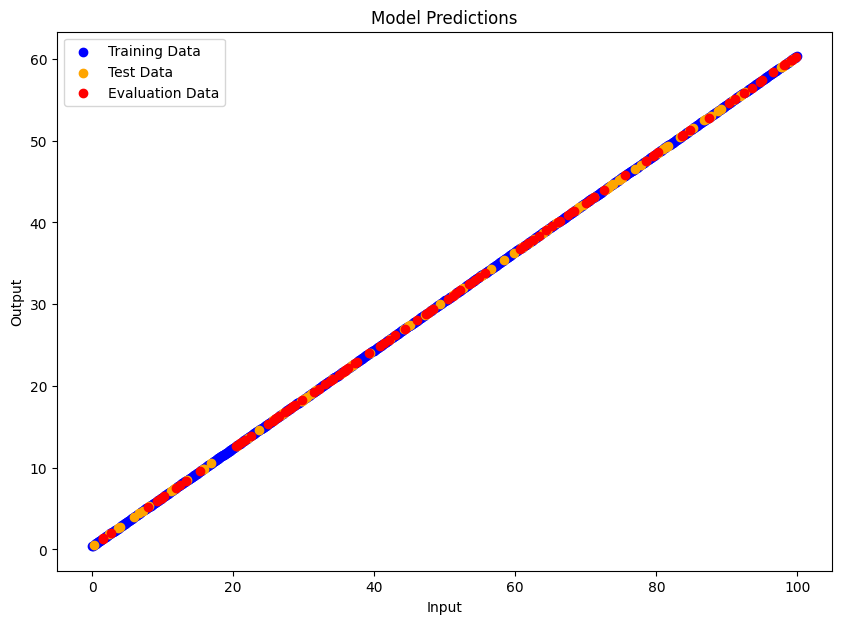

In [90]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     eval_data=X_eval,
                     eval_labels=y_eval,
                     predictions=None):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, color="blue", label="Training Data")
    plt.scatter(test_data, test_labels, color="orange", label="Test Data")
    plt.scatter(eval_data, eval_labels, color="red", label="Evaluation Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, color="green", label="Predictions")

    plt.legend()
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.title("Model Predictions")
    plt.show()

plot_predictions(X_train, y_train, X_test, y_test)
plt.show()

In [27]:
# 1. Initialize the random seed in PyTorch

torch.manual_seed(42)

In [28]:
torch.randn(1)

tensor([0.3367])

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias
    

In [94]:
model = LinearRegressionModel()
model

LinearRegressionModel()

In [95]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [96]:
with torch.inference_mode():
    y_pred = model(X_test)

y_pred[:5], y_test[:5]

(tensor([[12.5864],
         [23.3268],
         [29.5219],
         [27.6027],
         [13.3944]]),
 tensor([[22.6000],
         [41.7400],
         [52.7800],
         [49.3600],
         [24.0400]]))

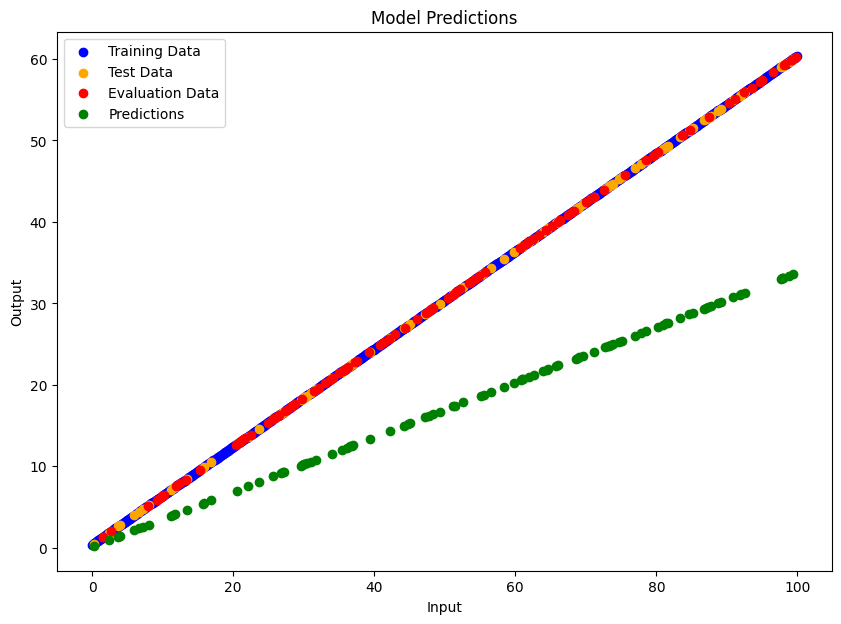

In [97]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_pred)
plt.show()

In [36]:
list(model.parameters())

[Parameter containing:
 tensor([0.1288], requires_grad=True),
 Parameter containing:
 tensor([0.2345], requires_grad=True)]

In [37]:
loss_fn = nn.L1Loss() # Mean Absolute Error

optimizer = optim.SGD(model.parameters(), lr=0.01)


In [80]:
import torch
import torch.nn as nn
import torch.optim as optim

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias
    

In [111]:
# Setting up the training loop

# 1. Initialize random seed
torch.manual_seed(42)

# 2. Initialize model, loss function, and optimizer
model = LinearRegressionModel()
loss_fn = nn.L1Loss()  # Mean Absolute Error
#optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer for better convergence

# 3. Set number of epochs
epochs = 50000

train_losses = []
test_losses = []
epoch_count = []

# 4. Training loop
for epoch in range(epochs):

    # a. Initialize the training
    model.train()

    # b. Forward pass (training)
    y_pred = model(X_train)

    # c. Compute losses
    loss = loss_fn(y_pred, y_train)

    # d. Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()  # Set model to evaluation mode

    # e. Validation
    with torch.inference_mode():
        test_pred = model(X_eval)
        test_loss = loss_fn(test_pred, y_eval)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")
            train_losses.append(loss.detach().numpy())
            test_losses.append(test_loss.detach().numpy())
            epoch_count.append(epoch)


Epoch: 0 | Train Loss: 13.32562 | Test Loss: 13.15484
Epoch: 10 | Train Loss: 12.81985 | Test Loss: 12.65365
Epoch: 20 | Train Loss: 12.31407 | Test Loss: 12.15245
Epoch: 30 | Train Loss: 11.80829 | Test Loss: 11.65126
Epoch: 40 | Train Loss: 11.30252 | Test Loss: 11.15007
Epoch: 50 | Train Loss: 10.79674 | Test Loss: 10.64887
Epoch: 60 | Train Loss: 10.29097 | Test Loss: 10.14768
Epoch: 70 | Train Loss: 9.78519 | Test Loss: 9.64649
Epoch: 80 | Train Loss: 9.27941 | Test Loss: 9.14529
Epoch: 90 | Train Loss: 8.77364 | Test Loss: 8.64410
Epoch: 100 | Train Loss: 8.26786 | Test Loss: 8.14291
Epoch: 110 | Train Loss: 7.76208 | Test Loss: 7.64171
Epoch: 120 | Train Loss: 7.25631 | Test Loss: 7.14052
Epoch: 130 | Train Loss: 6.75053 | Test Loss: 6.63932
Epoch: 140 | Train Loss: 6.24476 | Test Loss: 6.13813
Epoch: 150 | Train Loss: 5.73898 | Test Loss: 5.63694
Epoch: 160 | Train Loss: 5.23321 | Test Loss: 5.13574
Epoch: 170 | Train Loss: 4.72743 | Test Loss: 4.63455
Epoch: 180 | Train Loss: 

In [112]:
model.state_dict()

OrderedDict([('weight', tensor([0.6000])), ('bias', tensor([0.4000]))])

In [100]:
model.state_dict()

OrderedDict([('weight', tensor([0.6050])), ('bias', tensor([0.4000]))])

Epoch: 0 | MAE Train Loss: 18.29238510131836 | MAE Test Loss: 19.552175521850586 
Epoch: 10 | MAE Train Loss: 15.833382606506348 | MAE Test Loss: 16.886146545410156 
Epoch: 20 | MAE Train Loss: 13.374380111694336 | MAE Test Loss: 14.220118522644043 
Epoch: 30 | MAE Train Loss: 10.915375709533691 | MAE Test Loss: 11.554088592529297 
Epoch: 40 | MAE Train Loss: 8.456374168395996 | MAE Test Loss: 8.888060569763184 
Epoch: 50 | MAE Train Loss: 5.997371673583984 | MAE Test Loss: 6.2220306396484375 
Epoch: 60 | MAE Train Loss: 3.538379192352295 | MAE Test Loss: 3.5560131072998047 
Epoch: 70 | MAE Train Loss: 1.079391598701477 | MAE Test Loss: 0.8900004625320435 


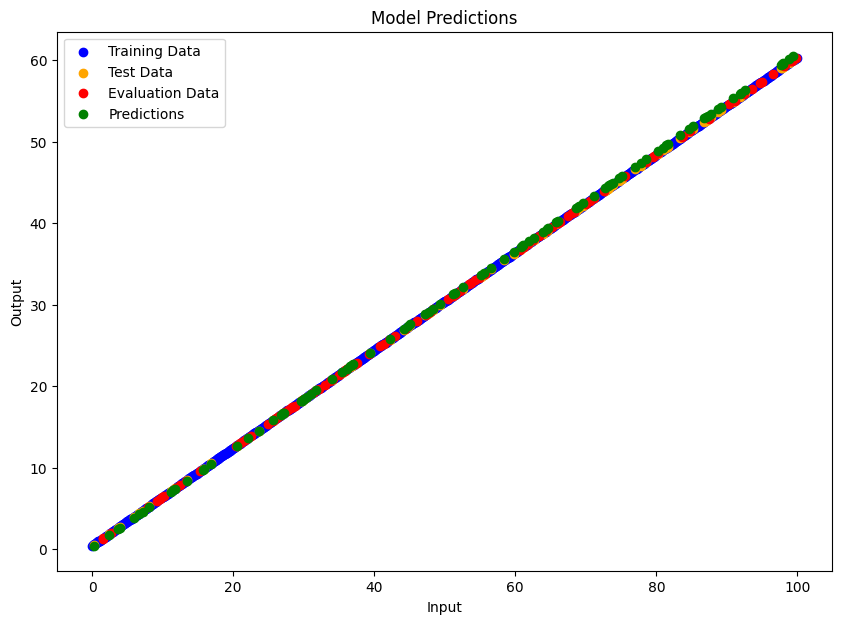

In [104]:
# Training the model using the training loop

model = LinearRegressionModel()

loss_fn = nn.L1Loss()  # Mean Absolute Error (MAE)
# Experiment with nn.MSELoss()

optimizer = optim.SGD(params=model.parameters(), lr=0.0001)  # lr -> Learning rate -> Hyper-parameter
# Experiment with optim.ADAM()

torch.manual_seed(42)

epochs = 75  # A kind of a Hyper-parameter

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    #print(f"Epoch {epoch+1}:")
    # Train the model
    model.train()

    # Forward pass (perform predictions based on current weight and bias)
    y_pred = model(X_train)

    # Calculate the loss
    loss = loss_fn(y_pred, y_train)
    #print(f"    Loss: {loss}")

    # Zero grad the optimizer
    optimizer.zero_grad()

    # Loss backwards (backwards pass)
    loss.backward()

    # Progress the optimizer -> updates the weight and bias - based on the loss gradients
    optimizer.step()

    # Evaluate the model
    model.eval()

    # Test the model
    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

plot_predictions(X_train, y_train, X_test, y_test, predictions=test_pred)
plt.show()

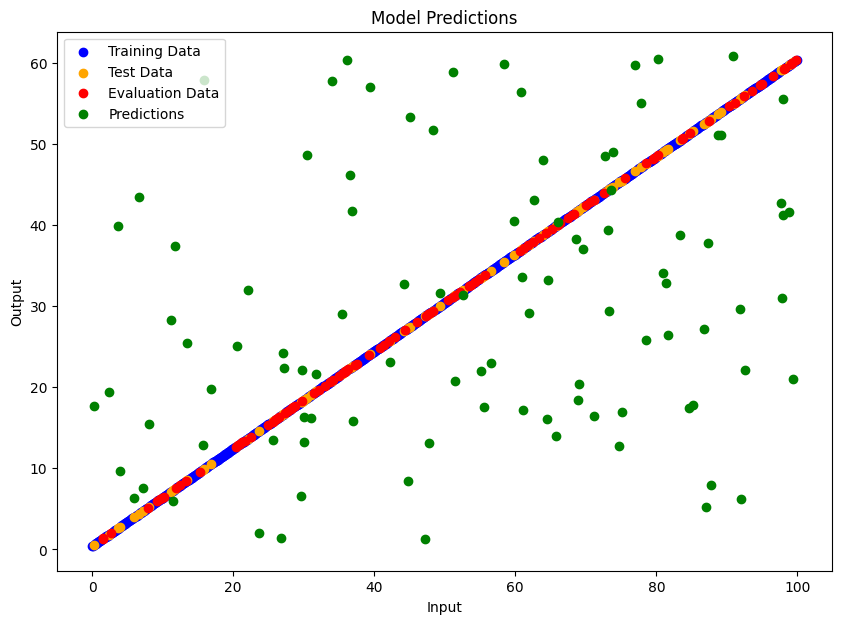

In [3]:
import pandas as pd
df = pd.read_csv("Datasets/Salary_dataset.csv")

df.drop(columns=["Unnamed: 0"], inplace=True)
df

YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0

<Axes: >

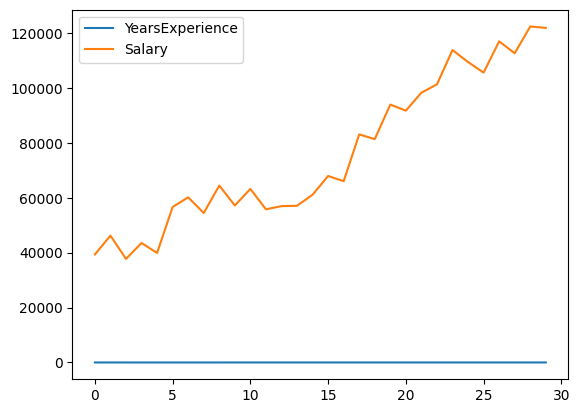

In [4]:
df.plot()

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

In [8]:
X = torch.tensor(df["YearsExperience"], dtype=torch.float32).unsqueeze(dim=1)
y = torch.tensor(df["Salary"], dtype=torch.float32).unsqueeze(dim=1)

In [10]:
y

tensor([[ 39344.],
        [ 46206.],
        [ 37732.],
        [ 43526.],
        [ 39892.],
        [ 56643.],
        [ 60151.],
        [ 54446.],
        [ 64446.],
        [ 57190.],
        [ 63219.],
        [ 55795.],
        [ 56958.],
        [ 57082.],
        [ 61112.],
        [ 67939.],
        [ 66030.],
        [ 83089.],
        [ 81364.],
        [ 93941.],
        [ 91739.],
        [ 98274.],
        [101303.],
        [113813.],
        [109432.],
        [105583.],
        [116970.],
        [112636.],
        [122392.],
        [121873.]])

In [12]:
X /= 10

In [13]:
X

tensor([[0.1200],
        [0.1400],
        [0.1600],
        [0.2100],
        [0.2300],
        [0.3000],
        [0.3100],
        [0.3300],
        [0.3300],
        [0.3800],
        [0.4000],
        [0.4100],
        [0.4100],
        [0.4200],
        [0.4600],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.6000],
        [0.6100],
        [0.6900],
        [0.7200],
        [0.8000],
        [0.8300],
        [0.8800],
        [0.9100],
        [0.9600],
        [0.9700],
        [1.0400],
        [1.0600]])

In [14]:
y /= 10

In [15]:
y

tensor([[ 3934.3999],
        [ 4620.6001],
        [ 3773.2000],
        [ 4352.6001],
        [ 3989.2000],
        [ 5664.2998],
        [ 6015.1001],
        [ 5444.6001],
        [ 6444.6001],
        [ 5719.0000],
        [ 6321.8999],
        [ 5579.5000],
        [ 5695.7998],
        [ 5708.2002],
        [ 6111.2002],
        [ 6793.8999],
        [ 6603.0000],
        [ 8308.9004],
        [ 8136.3999],
        [ 9394.0996],
        [ 9173.9004],
        [ 9827.4004],
        [10130.2998],
        [11381.2998],
        [10943.2002],
        [10558.2998],
        [11697.0000],
        [11263.5996],
        [12239.2002],
        [12187.2998]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))


24 6 24 6


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

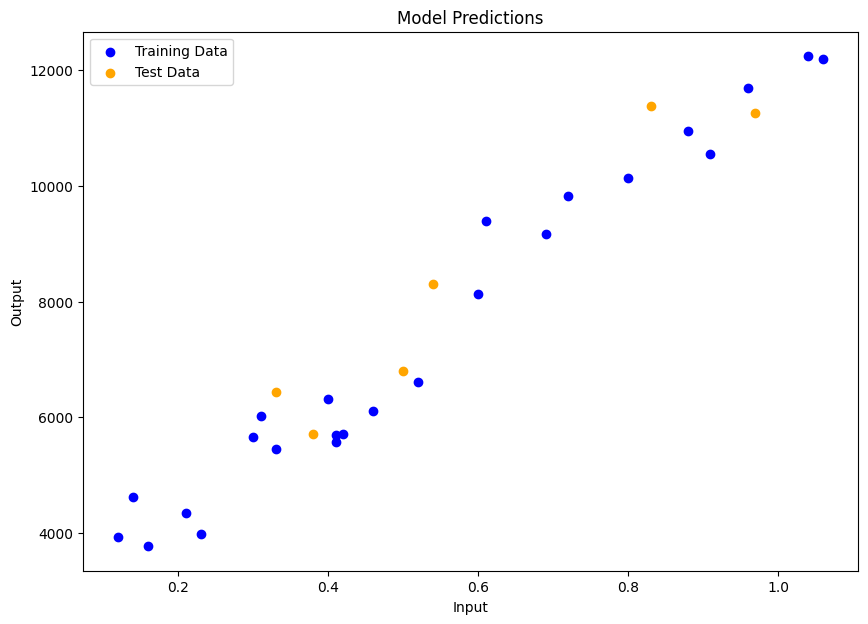

In [26]:

def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                    predictions=None):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, color="blue", label="Training Data")
    plt.scatter(test_data, test_labels, color="orange", label="Test Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, color="green", label="Predictions")

    plt.legend()
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.title("Model Predictions")
    plt.show()

plot_predictions(X_train, y_train, X_test, y_test)
plt.show()

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias
    

    Loss: 62707204.0
Epoch: 0 | MAE Train Loss: 62707204.0 | MAE Test Loss: 74265536.0 
    Loss: 62676320.0
    Loss: 62645456.0
    Loss: 62614608.0
    Loss: 62583776.0
    Loss: 62552964.0
    Loss: 62522160.0
    Loss: 62491376.0
    Loss: 62460608.0
    Loss: 62429856.0
    Loss: 62399120.0
Epoch: 10 | MAE Train Loss: 62399120.0 | MAE Test Loss: 73917504.0 
    Loss: 62368400.0
    Loss: 62337696.0
    Loss: 62307008.0
    Loss: 62276340.0
    Loss: 62245680.0
    Loss: 62215028.0
    Loss: 62184412.0
    Loss: 62153804.0
    Loss: 62123212.0
    Loss: 62092636.0
Epoch: 20 | MAE Train Loss: 62092636.0 | MAE Test Loss: 73571208.0 
    Loss: 62062068.0
    Loss: 62031524.0
    Loss: 62000992.0
    Loss: 61970484.0
    Loss: 61939980.0
    Loss: 61909504.0
    Loss: 61879040.0
    Loss: 61848588.0
    Loss: 61818156.0
    Loss: 61787728.0
Epoch: 30 | MAE Train Loss: 61787728.0 | MAE Test Loss: 73226640.0 
    Loss: 61757328.0
    Loss: 61726940.0
    Loss: 61696564.0
    Loss: 61666

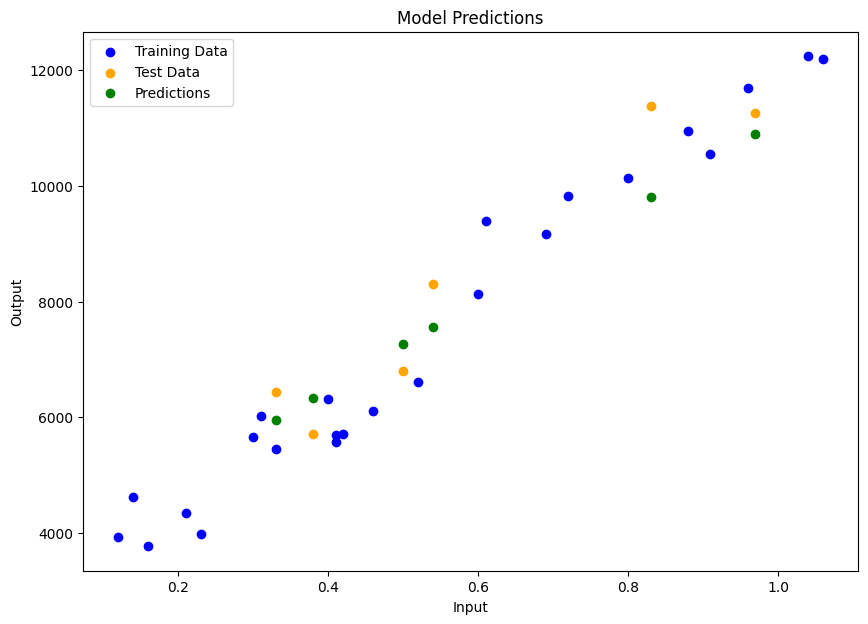

In [28]:
# Training the model using the training loop

model = LinearRegressionModel()

loss_fn = nn.MSELoss()  # Mean Squared Error (MSE)
# Experiment with nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.0001) # lr -> Learning rate -> Hyper-parameter
# Experiment with optim.ADAM()

torch.manual_seed(42)

epochs = 100000  # A kind of a Hyper-parameter

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    #print(f"Epoch {epoch+1}:")
    # Train the model
    model.train()

    # Forward pass (perform predictions based on current weight and bias)
    y_pred = model(X_train)

    # Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"    Loss: {loss}")

    # Zero grad the optimizer
    optimizer.zero_grad()

    # Loss backwards (backwards pass)
    loss.backward()

    # Progress the optimizer -> updates the weight and bias - based on the loss gradients
    optimizer.step()

    # Evaluate the model
    model.eval()

    # Test the model
    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

plot_predictions(X_train, y_train, X_test, y_test, predictions=test_pred)
plt.show()

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [3]:
device = torch.accelerator.current_accelerator().type if \
    torch.accelerator.is_available() else "cpu"

device

'mps'

In [4]:
%matplotlib inline

In [5]:
from torchvision.datasets import MNIST

mnist_train = MNIST(root="../Datasets/MNIST", train=True, download=True)

mnist_test = MNIST(root="../Datasets/MNIST", train=False, download=True)


In [6]:
def plot_filter(images, filter=None):

#    images = torch.cat([i.unsqueeze(0) for i in images],
#                                dim=0).cpu()
#    filter = torch.FloatTensor(filter).unsqueeze(0).unsqueeze(0).cpu()

    n_images = images.shape[0]

#    filtered_images = F.conv2d(images, filter)

    fig = plt.figure(figsize=(20, 5))

    for i in range(n_images):

        ax = fig.add_subplot(2, n_images, i+1)
        ax.imshow(images[i].squeeze(0), cmap='bone')
        ax.set_title('Original')
        ax.axis('off')

#        image = filtered_images[i].squeeze(0)

#        ax = fig.add_subplot(2, n_images, n_images+i+1)
#        ax.imshow(image, cmap='bone')
#        ax.set_title('Filtered')
#        ax.axis('off')

In [8]:
mnist_train[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

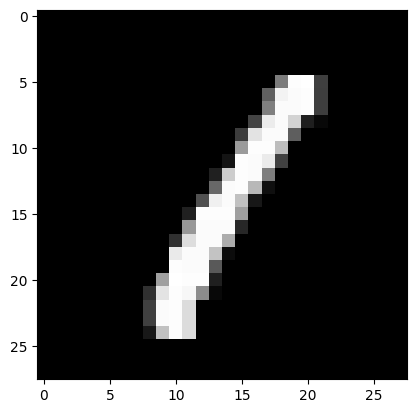

In [38]:
plt.imshow(mnist_train[3][0], cmap='gray')

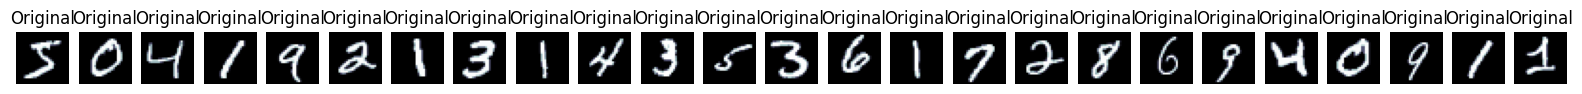

In [7]:
plot_filter(mnist_train.data[:25].unsqueeze(1), filter=None)

In [8]:
mnist_train.targets[:25]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1])

In [41]:
mnist_train.data.shape, mnist_train.targets.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [43]:
from torchvision import transforms

In [97]:
28 * 28 / 4

196.0

In [9]:
class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(28 * 28, 392)
        self.fc1 = nn.Linear(392, 196)
        self.fc2 = nn.Linear(196, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.input_layer(x))
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
model = SimpleNeuralNetwork()

In [12]:
from torch import optim
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [ ]:
def calculate_accuracy(y_pred, y):
    #y_pred = y_pred.unsqueeze(dim=1)
    #y = y.unsqueeze(dim=1)
    top_pred = y_pred.argmax(1, keepdim=True)
    #correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = 
    return acc

In [13]:
def calculate_accuracy(y_pred, y):
    return (y - y_pred).abs().mean()

In [50]:
!pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [25]:
import numpy as np
import time
from tqdm import tqdm, trange

In [14]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    #model.to(device)
    model.train()

    #print(f"Training...")

    for (x, y) in tqdm(iterator, desc="Training", leave=False):
        #print(f"Moving {x} to device")
        x = torch.from_numpy(np.array(x, dtype=np.float32))
        x = x.flatten().to(device)

        #print(f"Moving {y} to device")
        y = torch.from_numpy(np.array(y, dtype=np.float32))
        y = y.to(device)

        optimizer.zero_grad()

        #print("Performing predictions...")
        y_pred = model(x)

        loss = criterion(y_pred, y)
        acc = calculate_accuracy(y_pred, y)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [15]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    #model.to(device)
    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = torch.from_numpy(np.array(x, dtype=np.float32))
            x = x.flatten().to(device)

            y = torch.from_numpy(np.array(y, dtype=np.float32))
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [16]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [73]:
from tqdm import tqdm, trange
import time

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

17179885568

In [17]:
EPOCHS = 20

best_valid_loss = float("inf")

print(f"Using device: {device}")
model.to(device)

print("Model moved to device...")

for epoch in trange(EPOCHS):
    
    start_time = time.time()

    train_loss, train_acc = train(model, mnist_train, optimizer, criterion, device)
    #print(f"{epoch+1:02} Trained...")
    valid_loss, valid_acc = evaluate(model, mnist_test, criterion, device)
    #print(f"{epoch+1:02} Validated...")

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        #torch.save(model.state_dict(), "best_model.pt")

    print(f"Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s")
    print(f"\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%")
    print(f"\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%")

Using device: mps
Model moved to device...


  0%|          | 0/20 [02:07<?, ?it/s]


ValueError: too many values to unpack (expected 2)

In [112]:
a = torch.tensor([1, 2, 3, 4])
a.unsqueeze(1)

tensor([[1],
        [2],
        [3],
        [4]])

In [56]:
for x, y in mnist_train:
    print(x, y)
    break

<PIL.Image.Image image mode=L size=28x28 at 0x3231107D0> 5


In [78]:
img = mnist_train[0][0]
type(img)

PIL.Image.Image

In [85]:
import numpy as np

t = torch.from_numpy(np.array(img))
t.to(device)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   